In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Analyze Data

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# Seperate target from features
y_train = train['SalePrice']

In [6]:
# Data Distributoin
skewness = y_train.skew()
kurtosis = y_train.kurt()

print('Data Distribution of SalePrice(Target)')
print(f'skewness: {skewness}')
print(f'kurtosis: {kurtosis}')

Data Distribution of SalePrice(Target)
skewness: 1.8828757597682129
kurtosis: 6.536281860064529


First let's see how we measure the skewness and kurtosis:

<h3>Skewness</h3>
<ul>
    <li><b>Positive: </b>right skewed</li>
    <li><b>Negative: </b>left skewed</li>
    <li><b>Near Zero: </b>approximately symmetrical</li>
</ul>

<h3>Kurtosis</h3>
<ul>
    <li><b>Positive (Leptokurtic): </b>positive excess & peak at center (may have outlier)</li>
    <li><b>Negative (Platykurtic): </b>negative excess (may have fewer outlier)</li>
    <li><b>Near Zero (Mesokurtic): </b>normal distribution</li>
</ul>

    

We can see that our data is `skewness: 1.88 -> right-skewed` and `kurtosis: 6.53 -> higher-kurtosis` (distributed highly towards right and with heavy tails at centers with outliers). To see this let's see our target value in histogram:

<Axes: >

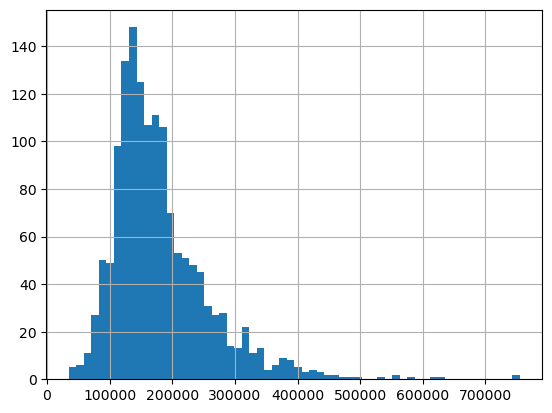

In [7]:
# Histogram of our target [SalePrice]
y_train.hist(bins=60)

From the histogram above we can see that the data distribution is not uniform at all and have outliers.

/var/folders/jh/_q3zsphn00z4nwx2cszyw4mc0000gn/T/ipykernel_37273/1628323018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


<Axes: >

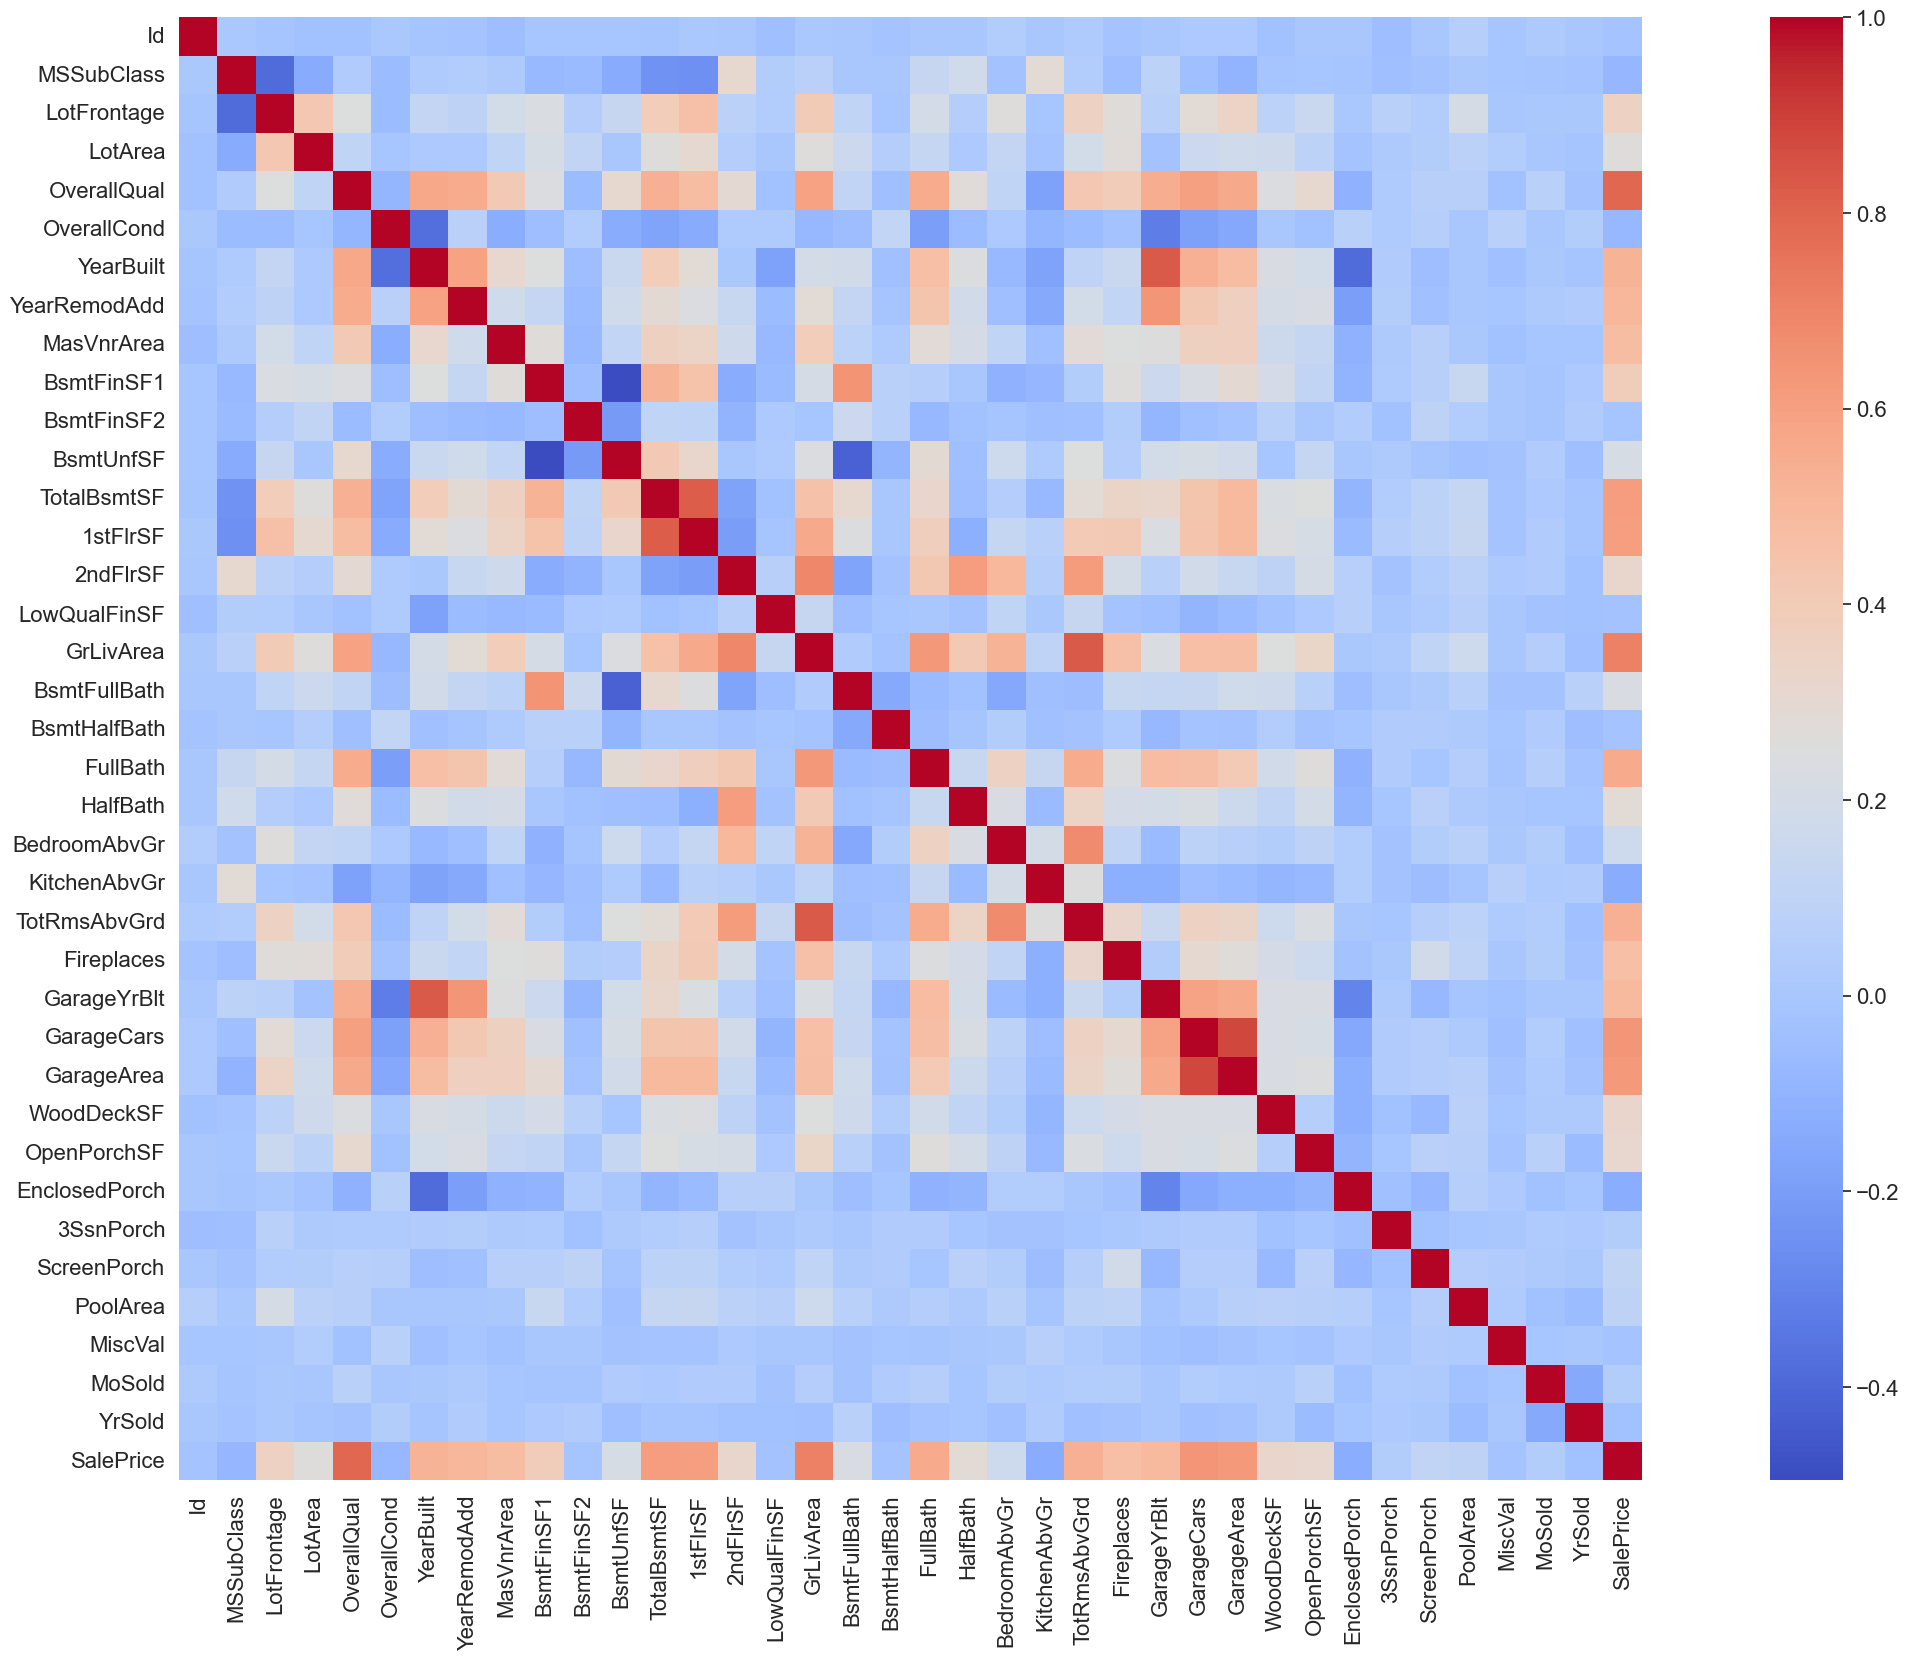

In [8]:
# Correlaton matrix
corr_matrix = train.corr()

plt.figure(figsize=(33, 19))
sns.set(font_scale=1.45)
sns.heatmap(corr_matrix, square=True, cmap='coolwarm')

In [9]:
correlations = corr_matrix["SalePrice"].sort_values(ascending=False)
features = correlations.index[0:20]
features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath'],
      dtype='object')

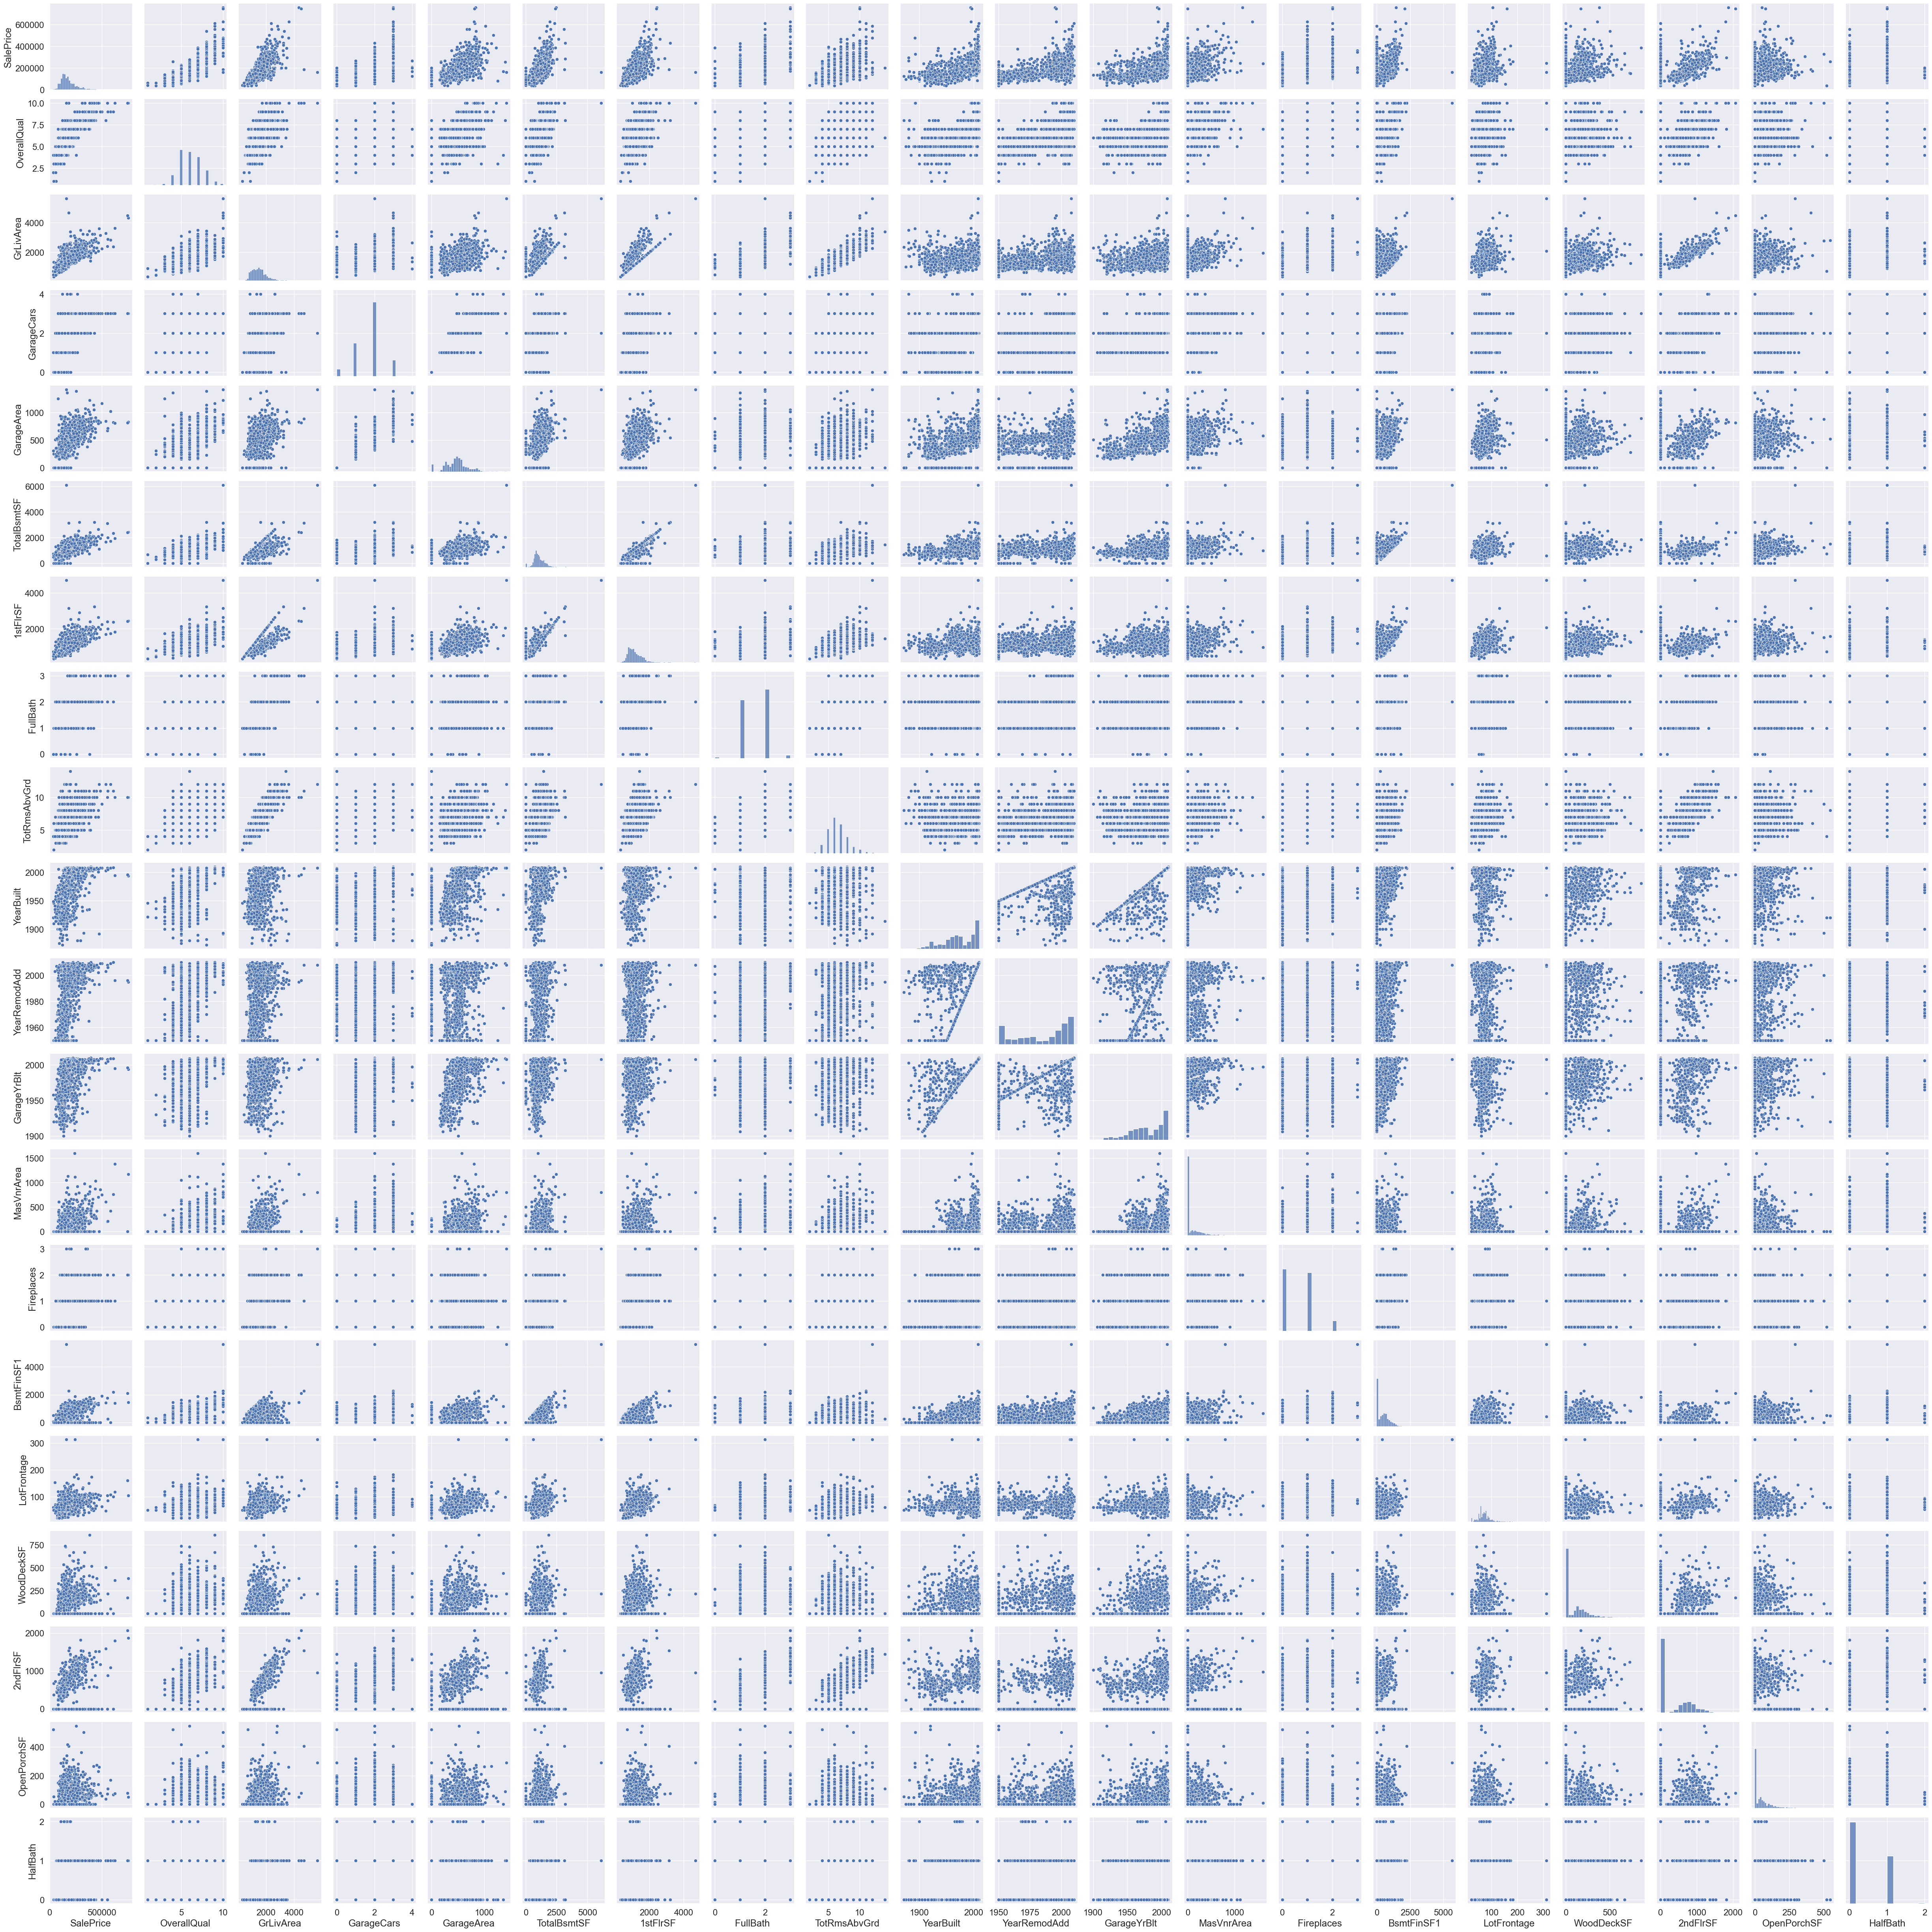

In [10]:
sns.pairplot(train[features], height = 2.5)
plt.show();

# Data Preprocessing

In [ ]:
training_null = pd.isnull(train).sum()
testing_null = pd.isnull(test).sum()

null = pd.concat([training_null, testing_null], axis=1, keys=["Training", "Testing"])
null

In [ ]:
def miss_values_info(df):
    # Assuming your DataFrame is named 'train'
    # Calculate the percentage of missing values for each column
    missing_percentage = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame to store the missing value information
    missing_info = pd.DataFrame({
        'Column': df.columns,
        'Missing Values': df.isnull().sum(),
        'Percentage': missing_percentage
    })

    # Filter the DataFrame to include only columns with missing values
    missing_info = missing_info[missing_info['Missing Values'] > 0]
    
    # Sort the DataFrame by the percentage of missing values in descending order
    missing_info = missing_info.sort_values(by='Percentage', ascending=False)

    # Display the columns with the most missing values
    return missing_info

In [ ]:
train_missing = miss_values_info(train)
print('train missing info: \n', train_missing)

train missing info: 
                     Column  Missing Values  Percentage
PoolQC              PoolQC            1453   99.520548
MiscFeature    MiscFeature            1406   96.301370
Alley                Alley            1369   93.767123
Fence                Fence            1179   80.753425
FireplaceQu    FireplaceQu             690   47.260274
LotFrontage    LotFrontage             259   17.739726
GarageType      GarageType              81    5.547945
GarageYrBlt    GarageYrBlt              81    5.547945
GarageFinish  GarageFinish              81    5.547945
GarageQual      GarageQual              81    5.547945
GarageCond      GarageCond              81    5.547945
BsmtExposure  BsmtExposure              38    2.602740
BsmtFinType2  BsmtFinType2              38    2.602740
BsmtFinType1  BsmtFinType1              37    2.534247
BsmtCond          BsmtCond              37    2.534247
BsmtQual          BsmtQual              37    2.534247
MasVnrArea      MasVnrArea               8 

In [14]:
test_missing = miss_values_info(test)
print('test missing info: \n', test_missing)

test missing info: 
                     Column  Missing Values  Percentage
PoolQC              PoolQC            1456   99.794380
MiscFeature    MiscFeature            1408   96.504455
Alley                Alley            1352   92.666210
Fence                Fence            1169   80.123372
FireplaceQu    FireplaceQu             730   50.034270
LotFrontage    LotFrontage             227   15.558602
GarageCond      GarageCond              78    5.346127
GarageYrBlt    GarageYrBlt              78    5.346127
GarageQual      GarageQual              78    5.346127
GarageFinish  GarageFinish              78    5.346127
GarageType      GarageType              76    5.209047
BsmtCond          BsmtCond              45    3.084304
BsmtExposure  BsmtExposure              44    3.015764
BsmtQual          BsmtQual              44    3.015764
BsmtFinType1  BsmtFinType1              42    2.878684
BsmtFinType2  BsmtFinType2              42    2.878684
MasVnrType      MasVnrType              16  

In [15]:
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=0, inplace=True)
test.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=0, inplace=True)

In [16]:
#Based on the description data file provided, all the variables who have meaningfull Nan

null_with_meaning = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "MasVnrType"]

#Replacing every Nan value with "None"

for i in null_with_meaning:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)

In [17]:
train_missing = miss_values_info(train)
print('train missing info: \n', train_missing)

train missing info: 
                   Column  Missing Values  Percentage
LotFrontage  LotFrontage             259   17.739726
GarageYrBlt  GarageYrBlt              81    5.547945
MasVnrArea    MasVnrArea               8    0.547945
Electrical    Electrical               1    0.068493


In [18]:
test_missing = miss_values_info(test)
print('test missing info: \n', test_missing)

test missing info: 
                     Column  Missing Values  Percentage
LotFrontage    LotFrontage             227   15.558602
GarageYrBlt    GarageYrBlt              78    5.346127
MasVnrArea      MasVnrArea              15    1.028101
MSZoning          MSZoning               4    0.274160
BsmtHalfBath  BsmtHalfBath               2    0.137080
Utilities        Utilities               2    0.137080
Functional      Functional               2    0.137080
BsmtFullBath  BsmtFullBath               2    0.137080
GarageArea      GarageArea               1    0.068540
GarageCars      GarageCars               1    0.068540
KitchenQual    KitchenQual               1    0.068540
TotalBsmtSF    TotalBsmtSF               1    0.068540
BsmtUnfSF        BsmtUnfSF               1    0.068540
BsmtFinSF2      BsmtFinSF2               1    0.068540
BsmtFinSF1      BsmtFinSF1               1    0.068540
Exterior2nd    Exterior2nd               1    0.068540
Exterior1st    Exterior1st               1  

In [19]:
from sklearn.impute import SimpleImputer

def impute_missing_values(df):
    # List of float type columns with missing values
    float_columns = df.select_dtypes(include=['float64']).columns.tolist()

    # List of object type columns with missing values
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Impute missing values for float type columns with the median
    float_imputer = SimpleImputer(strategy='mean')
    df[float_columns] = float_imputer.fit_transform(df[float_columns])

    # Impute missing values for object type columns with the most frequent category ('mode')
    object_imputer = SimpleImputer(strategy='most_frequent')
    df[object_columns] = object_imputer.fit_transform(df[object_columns])

    return df

In [20]:
train = impute_missing_values(train)
test = impute_missing_values(test)

In [21]:
train_missing = miss_values_info(train)
print('train missing info: \n', train_missing)
print('\n')
test_missing = miss_values_info(test)
print('test missing info: \n', test_missing)

train missing info: 
 Empty DataFrame
Columns: [Column, Missing Values, Percentage]
Index: []


test missing info: 
 Empty DataFrame
Columns: [Column, Missing Values, Percentage]
Index: []


In [22]:
categorical = []
for i in train.columns:
    if (train[i].dtype=='object'):
        categorical.append(i)
print("Categorical Attribute : {}\n ".format(len(categorical)))
categorical.append('MSSubClass')
for x in range(len(categorical)): 
    print(categorical[x])


Categorical Attribute : 38
 
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition
MSSubClass


In [23]:
(train[categorical].nunique()).sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
MSSubClass       15
Exterior1st      15
Condition1        9
SaleType          9
Condition2        8
HouseStyle        8
RoofMatl          8
GarageType        7
BsmtFinType1      7
Functional        7
BsmtFinType2      7
GarageQual        6
GarageCond        6
Heating           6
SaleCondition     6
Foundation        6
RoofStyle         6
ExterCond         5
LotConfig         5
BldgType          5
HeatingQC         5
Electrical        5
BsmtExposure      5
BsmtCond          5
BsmtQual          5
MSZoning          5
MasVnrType        4
ExterQual         4
KitchenQual       4
GarageFinish      4
LandContour       4
LotShape          4
LandSlope         3
PavedDrive        3
CentralAir        2
Street            2
Utilities         2
dtype: int64

In [24]:
for i in categorical:
    print(i)
    print(train[i].value_counts())
    print()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Bl

In [25]:
# train = train.drop(columns=['SalePrice'], axis=1)

# Feature Engineering

In [26]:
train['LogPrice'] = np.log(y_train)

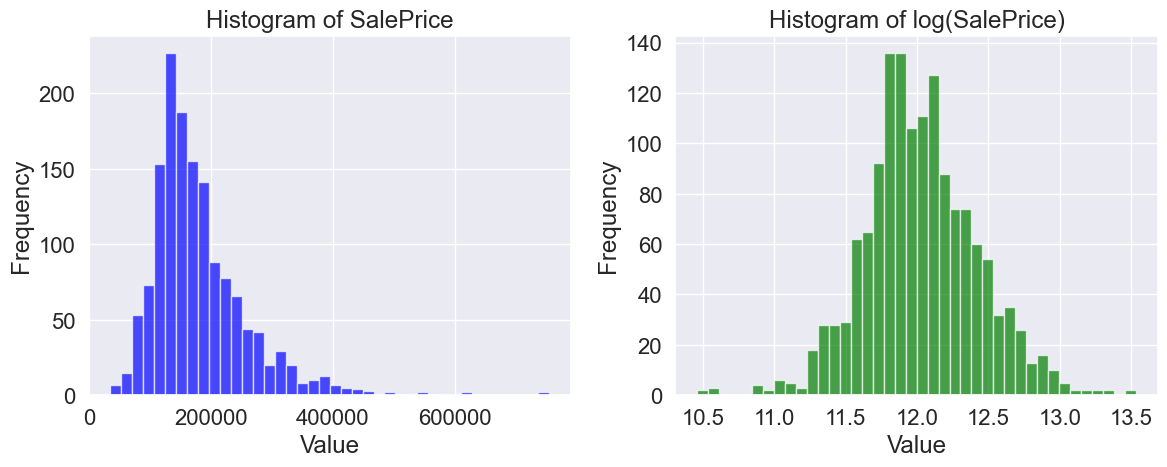

In [27]:
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot: Histogram of y_train
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.hist(y_train, bins=40, color='blue', alpha=0.7)
plt.title("Histogram of SalePrice")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Second subplot: Histogram of train['LogPrice']
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.hist(train['LogPrice'], bins=40, color='green', alpha=0.7)
plt.title("Histogram of log(SalePrice)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
# Data Distributoin
skewness = y_train.skew()
kurtosis = y_train.kurt()

print('Data Distribution of SalePrice(Target)')
print(f'skewness: {skewness}')
print(f'kurtosis: {kurtosis}')

Data Distribution of SalePrice(Target)
skewness: 1.8828757597682129
kurtosis: 6.536281860064529


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [30]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Initialize a LabelEncoder
    label_encoder = LabelEncoder()
    
    # List of object type columns with missing values
    object_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Encode each object column
    for column in object_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df

In [31]:
encoded_train = encode_categorical_columns(train)
encoded_test = encode_categorical_columns(test)

In [32]:
y_train_log = encoded_train['LogPrice']
encoded_train = encoded_train.drop(columns=['LogPrice', 'SalePrice'])

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform on the training data
train_scaled = scaler.fit_transform(encoded_train)

# Transform the test data using the same scaler
test_scaled = scaler.transform(encoded_test)

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_scaled, y_train_log, test_size=0.2, random_state=42)

# Selecting Model

In [35]:
from pycaret import *
from pycaret.regression import *

In [36]:
exp_1 = setup(data=train_scaled, target=y_train_log)
best_model = compare_models()

In [37]:
br = create_model('gbr')

In [38]:
tuned_br = tune_model(br, 
                      search_library='optuna',
                     search_algorithm='random')

[I 2023-10-09 14:37:18,318] Searching the best hyperparameters using 1021 samples...
[I 2023-10-09 14:37:21,956] Finished hyperparemeter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
y_pred = tuned_br.predict(test_scaled)

In [40]:
sub_pred = np.exp(y_pred)

In [41]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': sub_pred})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('sample_submission.csv', index=False)